In [10]:
!pwd

/c/Users/crisa/EPAT


In [11]:
import csv
import pandas as pd
import numpy as np

## Reading the index prices

In [3]:
companies = pd.read_csv("companies.csv")
companies

,Ticker,RIC,Name
0,C,C.N,CITIGROUP INC.
1,GM,GM.N,GENERAL MOTORS COMPANY
2,BAC,BAC.N,BANK OF AMERICA CORP.
3,JPM,JPM.N,JPMORGAN CHASE & CO.
4,F,F.N,FORD MOTOR CO.
5,AAPL,AAPL.O,APPLE INC.
6,MSFT,MSFT.O,MICROSOFT CORPORATION
7,XOM,XOM.N,EXXON MOBIL CORPORATION
8,WMT,WMT.N,WALMART INC.
9,BA,BA.N,BOEING


In [5]:
prices = pd.read_csv("marketData_SP500.csv")
prices.date = pd.to_datetime(prices.date, format = "%Y%m%d")
prices

,date,adjOpen,adjHigh,adjLow,adjClose
0,2007-01-03,1418.03,1429.42,1407.86,1416.60
1,2007-01-04,1416.60,1421.84,1408.22,1418.34
2,2007-01-05,1418.34,1418.34,1405.75,1409.71
3,2007-01-08,1409.26,1414.98,1403.97,1412.84
4,2007-01-09,1412.84,1415.61,1405.42,1412.11
...,...,...,...,...,...
751,2009-12-24,1121.08,1126.48,1121.08,1126.48
752,2009-12-28,1127.53,1130.38,1123.51,1127.78
753,2009-12-29,1128.55,1130.38,1126.08,1126.20
754,2009-12-30,1125.53,1126.42,1121.94,1126.42


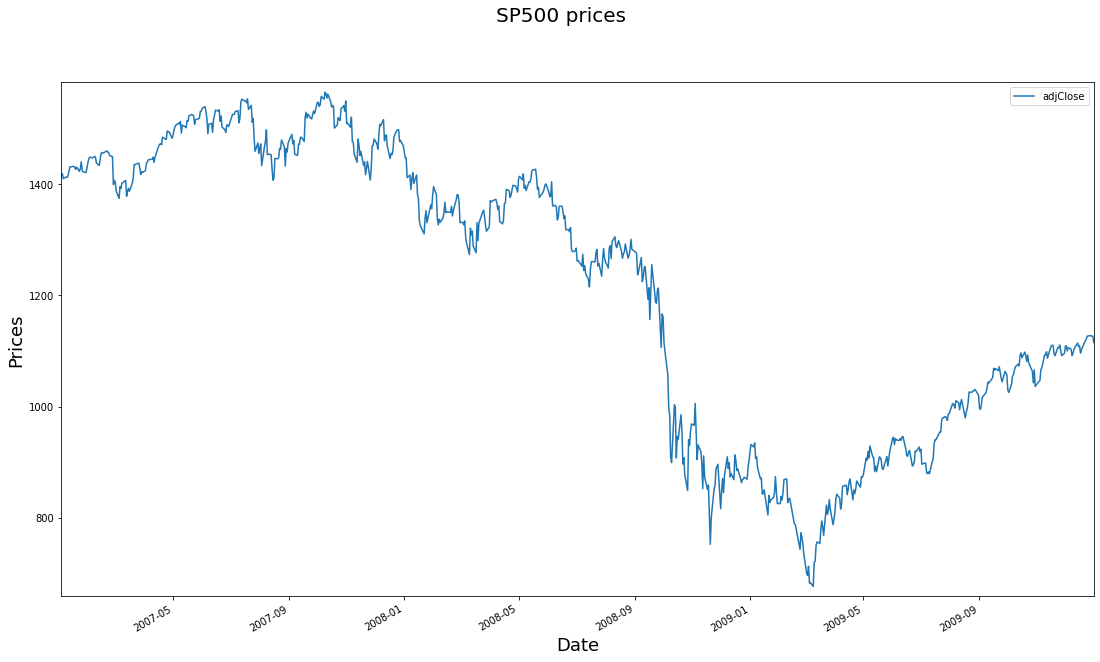

In [9]:
import matplotlib.pyplot as plt

prices.plot(x = 'date', y = 'adjClose')
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Prices", fontsize = 18)
plt.suptitle("SP500 prices", fontsize = 20)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)


## Reading the sentiment data file

In [28]:
sentimentData = pd.read_csv("sentimentData.csv");
sentimentData.DATE = pd.to_datetime(sentimentData.DATE, format = "%Y-%m-%d")
print("Number of rows: %d" % sentimentData.shape[0]);
sentimentData

Number of rows: 207958


,IDN_TIME,DATE,TIME,STOCK_RIC,RELEVANCE,SENT_SCORE,SENTIMENT,SENT_POS,SENT_NEUT,SENT_NEG,BCAST_TEXT
0,2007-01-01 11:29:56.335,2007-01-01,11:29:56.335000,WMT.N,0.250000,-0.51,-1,0.217393,0.275610,0.506997,PRESS DIGEST - Wall Street Journal - Jan 1
1,2007-01-01 12:08:37.190,2007-01-01,12:08:37.190000,MSFT.O,0.433013,-0.73,-1,0.079403,0.192469,0.728128,PRESS DIGEST - New York Times - Jan 1
2,2007-01-01 15:03:13.649,2007-01-01,15:03:13.649000,MSFT.O,0.239046,-0.82,-1,0.056393,0.126321,0.817286,Seoul antitrust body forms team on Qualcomm-re...
3,2007-01-01 16:57:05.625,2007-01-01,16:57:05.625000,C.N,0.117851,0.55,1,0.552244,0.439964,0.007792,BNP Paribas top 2006 M&A adviser in France -su...
4,2007-01-01 19:01:13.537,2007-01-01,19:01:13.537000,GE.N,0.223607,0.45,1,0.446528,0.393965,0.159507,"Stiller, Smith achieve box office milestones"
...,...,...,...,...,...,...,...,...,...,...,...
207953,2009-12-31 20:50:09.892,2009-12-31,20:50:09.892000,C.N,0.500000,0.00,0,0.180099,0.589235,0.230667,NYSE ORDER IMBALANCE <C.N> 2190100 SHARES ON S...
207954,2009-12-31 20:50:16.016,2009-12-31,20:50:16.016000,GE.N,1.000000,0.00,0,0.059990,0.923560,0.016450,NYSE General Electric Co (us;GE) MOC Sell Imba...
207955,2009-12-31 20:50:20.966,2009-12-31,20:50:20.966000,C.N,1.000000,0.00,0,0.222717,0.613300,0.163983,NYSE Citigroup Inc (us;C) MOC Sell Imbalance: ...
207956,2009-12-31 22:07:16.831,2009-12-31,22:07:16.831000,GE.N,0.051031,-0.79,-1,0.067522,0.141548,0.790929,"UPDATE 1-Time Warner Cable, Fox at impasse; bl..."


## Counting the number of news events

 - Per company
 - Per day

In [29]:
sentimentData['COUNT'] = np.ones(sentimentData.shape[0], dtype = 'int')
sentimentData

,IDN_TIME,DATE,TIME,STOCK_RIC,RELEVANCE,SENT_SCORE,SENTIMENT,SENT_POS,SENT_NEUT,SENT_NEG,BCAST_TEXT,COUNT
0,2007-01-01 11:29:56.335,2007-01-01,11:29:56.335000,WMT.N,0.250000,-0.51,-1,0.217393,0.275610,0.506997,PRESS DIGEST - Wall Street Journal - Jan 1,1
1,2007-01-01 12:08:37.190,2007-01-01,12:08:37.190000,MSFT.O,0.433013,-0.73,-1,0.079403,0.192469,0.728128,PRESS DIGEST - New York Times - Jan 1,1
2,2007-01-01 15:03:13.649,2007-01-01,15:03:13.649000,MSFT.O,0.239046,-0.82,-1,0.056393,0.126321,0.817286,Seoul antitrust body forms team on Qualcomm-re...,1
3,2007-01-01 16:57:05.625,2007-01-01,16:57:05.625000,C.N,0.117851,0.55,1,0.552244,0.439964,0.007792,BNP Paribas top 2006 M&A adviser in France -su...,1
4,2007-01-01 19:01:13.537,2007-01-01,19:01:13.537000,GE.N,0.223607,0.45,1,0.446528,0.393965,0.159507,"Stiller, Smith achieve box office milestones",1
...,...,...,...,...,...,...,...,...,...,...,...,...
207953,2009-12-31 20:50:09.892,2009-12-31,20:50:09.892000,C.N,0.500000,0.00,0,0.180099,0.589235,0.230667,NYSE ORDER IMBALANCE <C.N> 2190100 SHARES ON S...,1
207954,2009-12-31 20:50:16.016,2009-12-31,20:50:16.016000,GE.N,1.000000,0.00,0,0.059990,0.923560,0.016450,NYSE General Electric Co (us;GE) MOC Sell Imba...,1
207955,2009-12-31 20:50:20.966,2009-12-31,20:50:20.966000,C.N,1.000000,0.00,0,0.222717,0.613300,0.163983,NYSE Citigroup Inc (us;C) MOC Sell Imbalance: ...,1
207956,2009-12-31 22:07:16.831,2009-12-31,22:07:16.831000,GE.N,0.051031,-0.79,-1,0.067522,0.141548,0.790929,"UPDATE 1-Time Warner Cable, Fox at impasse; bl...",1


In [30]:
newsEventsPerCompany = sentimentData.groupby(['STOCK_RIC']).COUNT.sum();
newsEventsPerCompany

STOCK_RIC
AAPL.O    13495
BA.N      14683
BAC.N     27200
C.N       36479
F.N       22768
GE.N      19889
JPM.N     25193
MSFT.O    17459
WMT.N     13906
XOM.N     16886
Name: COUNT, dtype: int32

In [31]:
newsEventsPerDay = sentimentData.groupby(['DATE']).COUNT.sum().reset_index();
newsEventsPerDay.head(20)

,DATE,COUNT
0,2007-01-01,5
1,2007-01-02,66
2,2007-01-03,170
3,2007-01-04,152
4,2007-01-05,114
5,2007-01-06,9
6,2007-01-07,35
7,2007-01-08,296
8,2007-01-09,279
9,2007-01-10,292


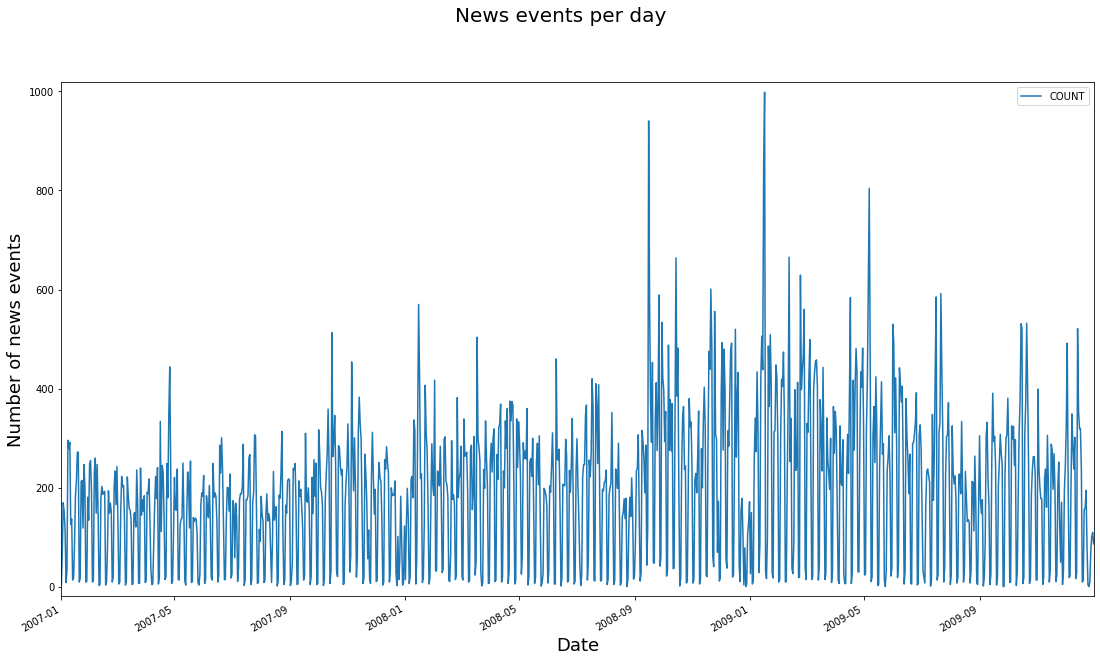

In [32]:
newsEventsPerDay.plot(x = 'DATE', y = 'COUNT')

plt.xlabel("Date", fontsize = 18)
plt.ylabel("Number of news events", fontsize = 18)
plt.suptitle("News events per day", fontsize = 20)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)

## Calculating an average daily sentiment by aggregating all companies

In [33]:
sentiment = sentimentData.groupby(['DATE']).SENT_SCORE.mean().reset_index();
sentiment.head(20)

,DATE,SENT_SCORE
0,2007-01-01,-0.212000
1,2007-01-02,0.051970
2,2007-01-03,-0.065765
3,2007-01-04,0.054474
4,2007-01-05,-0.186842
5,2007-01-06,-0.174444
6,2007-01-07,0.068000
7,2007-01-08,0.011959
8,2007-01-09,-0.043548
9,2007-01-10,-0.029281


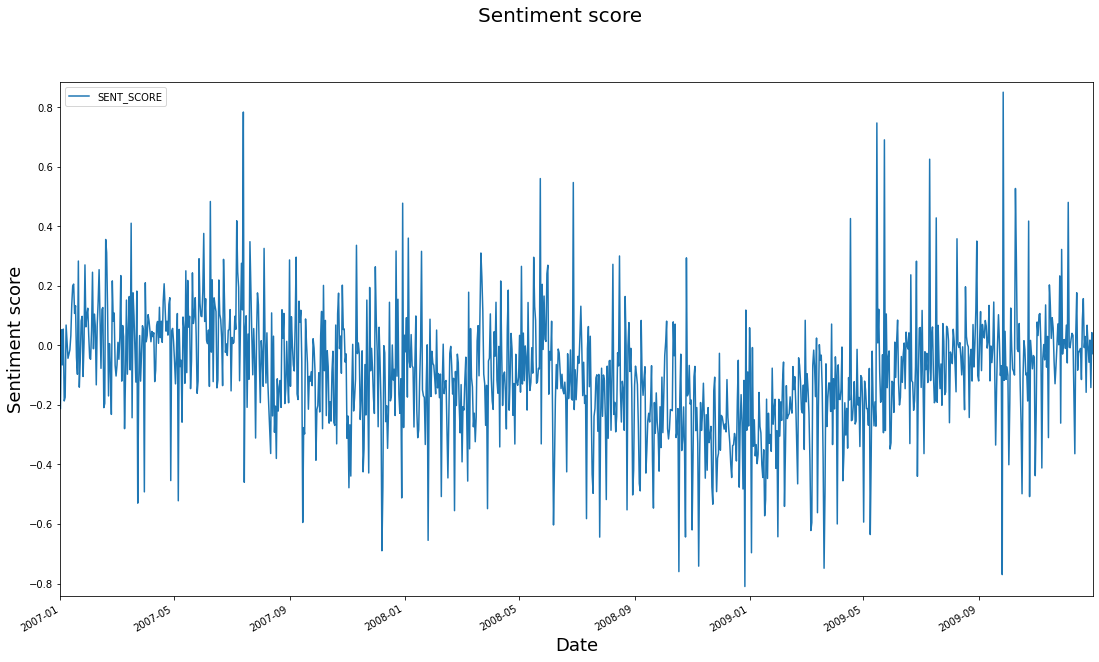

In [35]:
sentiment.plot(x = 'DATE', y = 'SENT_SCORE')

plt.xlabel("Date", fontsize = 18)
plt.ylabel("Sentiment score", fontsize = 18)
plt.suptitle("Sentiment score", fontsize = 20)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)

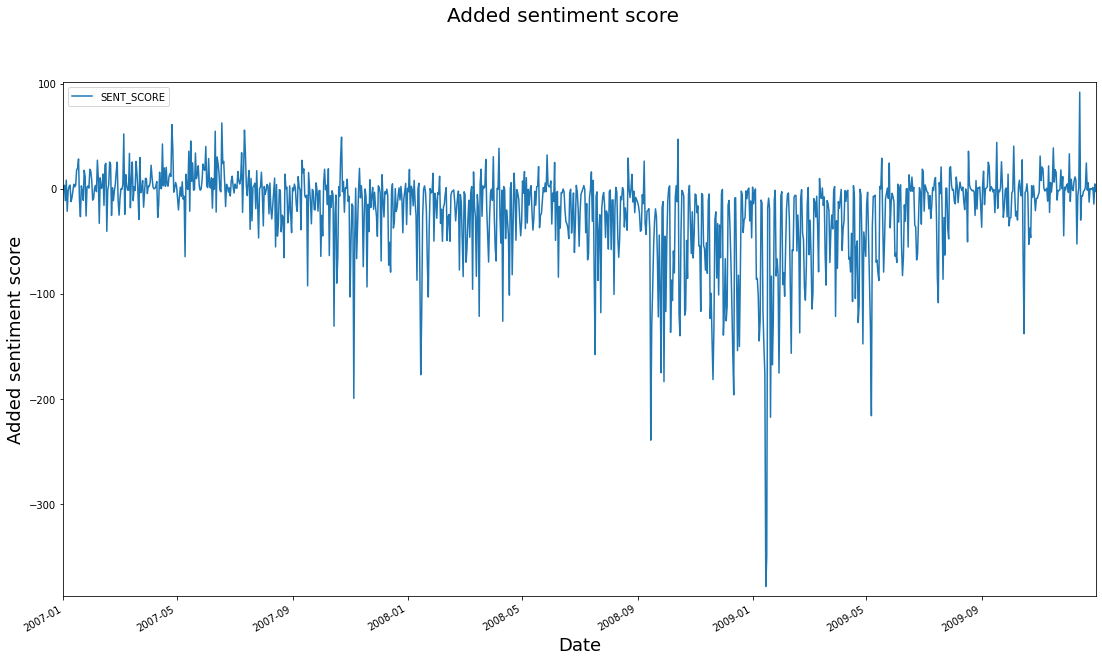

In [37]:
sentiment = sentimentData.groupby(['DATE']).SENT_SCORE.sum().reset_index();

sentiment.plot(x = 'DATE', y = 'SENT_SCORE')

plt.xlabel("Date", fontsize = 18)
plt.ylabel("Added sentiment score", fontsize = 18)
plt.suptitle("Added sentiment score", fontsize = 20)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)

## Index overall sentiment

We will compute the index sentiment by aggregating the sentiment for all companies as if it was a proxy for the index sentiment

In [39]:
sentiment = sentiment.rename(columns = {'DATE' : 'date'});
print(sentiment.head(10))
print(prices.head(10))

        date  SENT_SCORE
0 2007-01-01       -1.06
1 2007-01-02        3.43
2 2007-01-03      -11.18
3 2007-01-04        8.28
4 2007-01-05      -21.30
5 2007-01-06       -1.57
6 2007-01-07        2.38
7 2007-01-08        3.54
8 2007-01-09      -12.15
9 2007-01-10       -8.55
        date  adjOpen  adjHigh   adjLow  adjClose
0 2007-01-03  1418.03  1429.42  1407.86   1416.60
1 2007-01-04  1416.60  1421.84  1408.22   1418.34
2 2007-01-05  1418.34  1418.34  1405.75   1409.71
3 2007-01-08  1409.26  1414.98  1403.97   1412.84
4 2007-01-09  1412.84  1415.61  1405.42   1412.11
5 2007-01-10  1411.94  1415.99  1404.33   1414.85
6 2007-01-11  1414.84  1427.12  1414.84   1423.82
7 2007-01-12  1423.82  1431.23  1422.58   1430.73
8 2007-01-16  1430.73  1433.93  1428.62   1431.90
9 2007-01-17  1431.77  1435.27  1428.57   1430.62


In [49]:

# If you want to exclude weekends, user inner instead of outer
df = pd.merge(prices, sentiment, on = "date", how = 'outer', sort = True);
df = df.fillna(method = "ffill");
df = df.fillna(method = "bfill");
df.head(20)

,date,adjOpen,adjHigh,adjLow,adjClose,SENT_SCORE
0,2007-01-01,1418.03,1429.42,1407.86,1416.60,-1.06
1,2007-01-02,1418.03,1429.42,1407.86,1416.60,3.43
2,2007-01-03,1418.03,1429.42,1407.86,1416.60,-11.18
3,2007-01-04,1416.60,1421.84,1408.22,1418.34,8.28
4,2007-01-05,1418.34,1418.34,1405.75,1409.71,-21.30
5,2007-01-06,1418.34,1418.34,1405.75,1409.71,-1.57
6,2007-01-07,1418.34,1418.34,1405.75,1409.71,2.38
7,2007-01-08,1409.26,1414.98,1403.97,1412.84,3.54
8,2007-01-09,1412.84,1415.61,1405.42,1412.11,-12.15
9,2007-01-10,1411.94,1415.99,1404.33,1414.85,-8.55


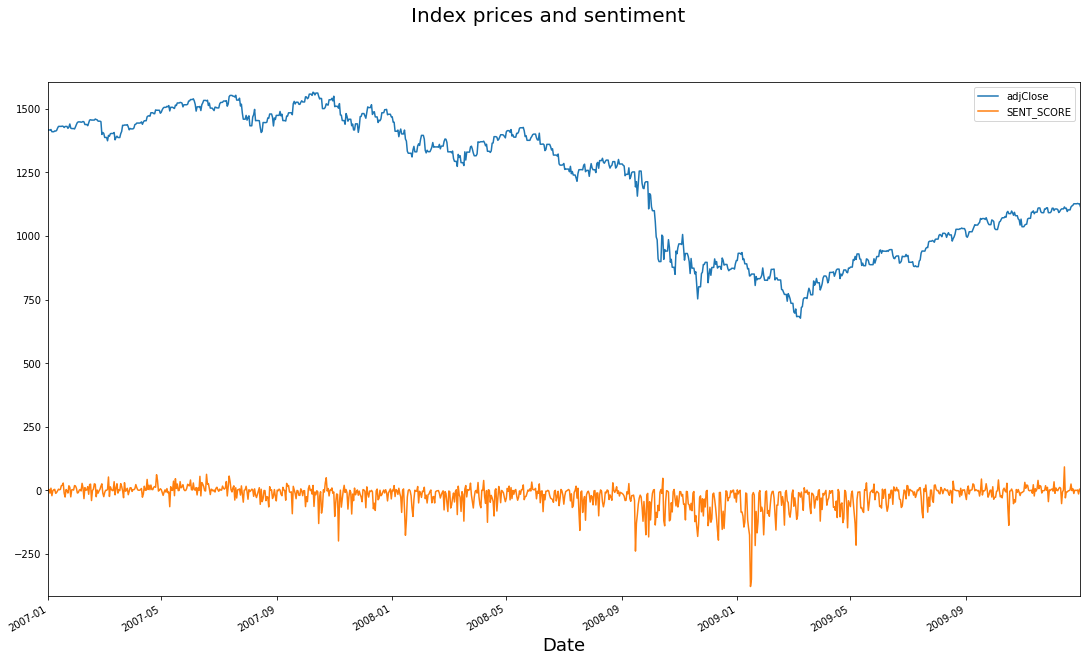

In [50]:
df.plot(x = 'date', y = ['adjClose', 'SENT_SCORE']);

plt.xlabel("Date", fontsize = 18)
plt.suptitle("Index prices and sentiment", fontsize = 20)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)

In [54]:
df['MA'] = df['SENT_SCORE'].rolling(60).mean();
df[55:85].head(30)

,date,adjOpen,adjHigh,adjLow,adjClose,SENT_SCORE,MA
55,2007-02-25,1456.22,1456.22,1448.36,1451.19,4.11,NaN
56,2007-02-26,1451.04,1456.95,1445.48,1449.37,16.25,NaN
57,2007-02-27,1449.25,1449.25,1389.42,1399.04,25.39,NaN
58,2007-02-28,1398.64,1415.89,1396.65,1406.82,-11.17,NaN
59,2007-03-01,1406.80,1409.46,1380.87,1403.17,-25.06,1.089500
60,2007-03-02,1403.16,1403.40,1386.87,1387.17,-8.75,0.961333
61,2007-03-03,1403.16,1403.40,1386.87,1387.17,0.06,0.905167
62,2007-03-04,1403.16,1403.40,1386.87,1387.17,-0.47,1.083667
63,2007-03-05,1387.11,1391.86,1373.97,1374.12,4.03,1.012833
64,2007-03-06,1374.06,1397.90,1374.06,1395.41,52.23,2.238333


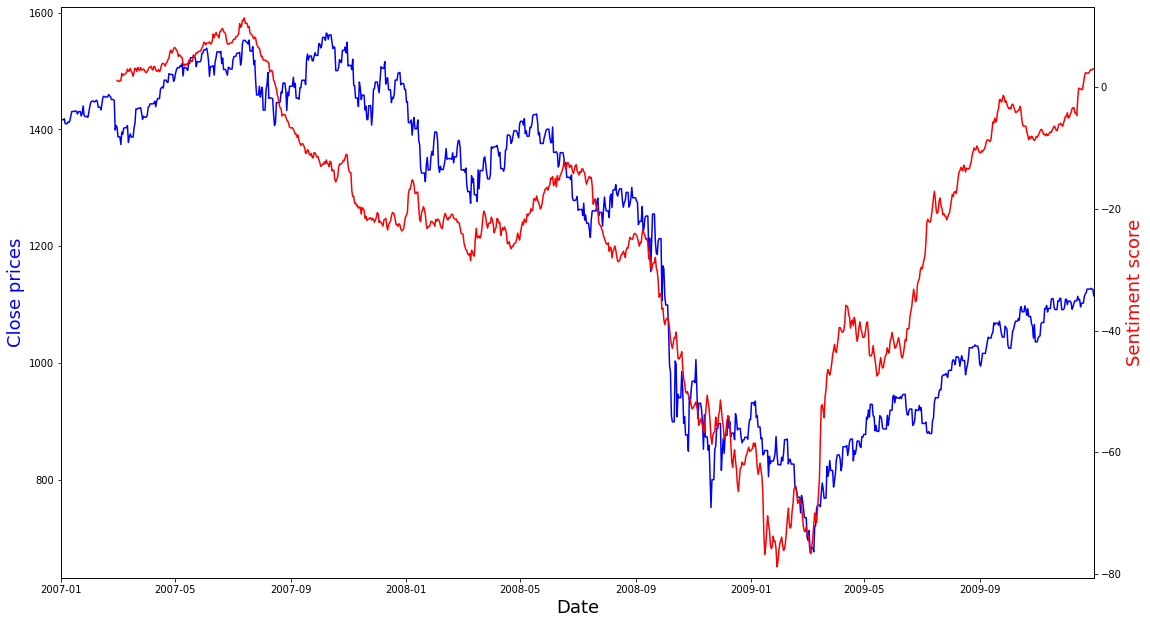

In [56]:
x  = df.date;
y1 = df.adjClose;
y2 = df.MA;

fig, ax1 = plt.subplots();
ax2 = ax1.twinx();

ax1.plot(x, y1, 'blue')
ax2.plot(x, y2, 'red')

ax1.set_xlabel("Date", fontsize = 18)
ax1.set_ylabel("Close prices", color = "blue", fontsize = 18)
ax2.set_ylabel("Sentiment score", color = "red", fontsize = 18)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)

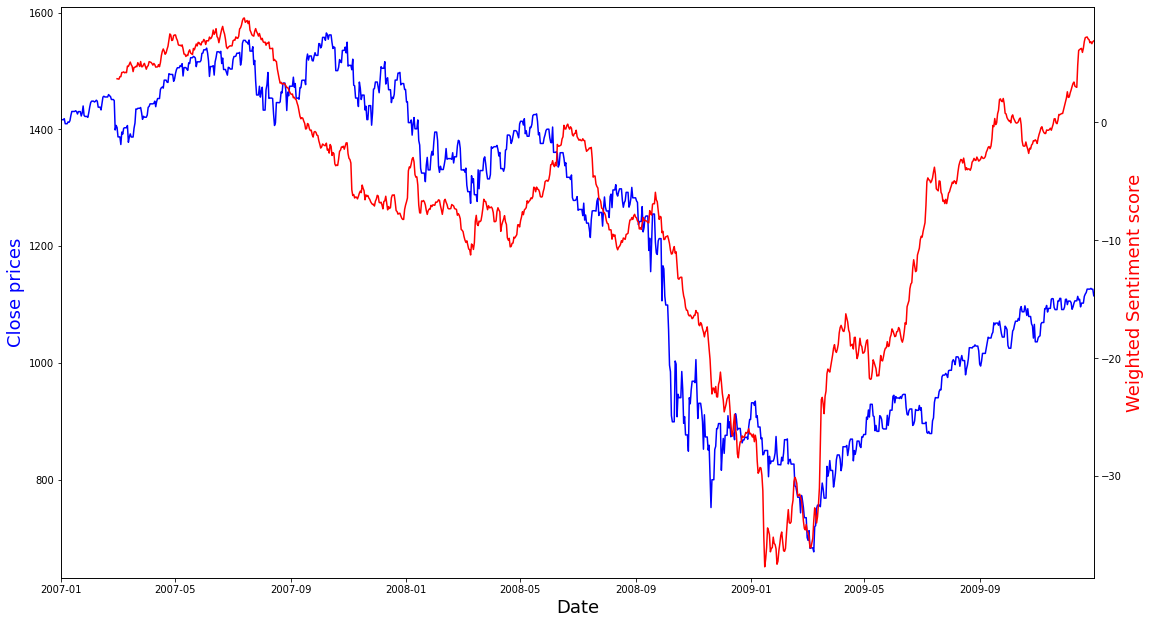

In [60]:
sentimentData['WEIGHTED_SENT'] = sentimentData.SENT_SCORE * sentimentData.RELEVANCE
sentimentWeighted = sentimentData.groupby(['DATE']).WEIGHTED_SENT.sum().reset_index();
sentimentWeighted = sentimentWeighted.rename(columns = {'DATE' : 'date'})

df = pd.merge(prices, sentimentWeighted, on = "date", how = 'outer', sort = True);
df = df.fillna(method = "ffill");
df = df.fillna(method = "bfill");
df['MA'] = df['WEIGHTED_SENT'].rolling(60).mean();

x  = df.date;
y1 = df.adjClose;
y2 = df.MA;

fig, ax1 = plt.subplots();
ax2 = ax1.twinx();

ax1.plot(x, y1, 'blue')
ax2.plot(x, y2, 'red')

ax1.set_xlabel("Date", fontsize = 18)
ax1.set_ylabel("Close prices", color = "blue", fontsize = 18)
ax2.set_ylabel("Weighted Sentiment score", color = "red", fontsize = 18)

plt.margins(0, 0.02)
plt.gcf().set_size_inches(18.5, 10.5)
